Libraries dependices:
1. numpy
2. pandas
3. sklearn --> datasets --> load_boston()
4. sklearn --> model_selection --> train_test_split
5. xgboost --> XGBRegressor
6. sklearn --> metrics --> RMS
7. matplotlib --> pyplot
8. seaborn 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 

In [2]:
# loading boston houser price dataset from sklearn
house_data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# displaying dataset
house_data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [4]:
# Loading this data into pandas DataFrame
house_price_data = pd.DataFrame(house_data.data, columns = house_data.feature_names)

In [5]:
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Data Processing** 


The above dataset doesn't have target (house price) dataset

In [6]:
# adding target (price) of column in the dataset
house_price_data['price'] = house_data.target

In [7]:
# now displaying dataFrame
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# The shape of DataFrame
house_price_data.shape

(506, 14)

In [9]:
# checking for the null value
house_price_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

The above dataset has doesn't any missing values.







Stastical measures

In [10]:
# stastical measure
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
 # this method is help us to understand the dataset better
house_price_data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the corelation between features.
1. Positve corelations
2. Negative corelations

In [12]:
corelation = house_price_data.corr()

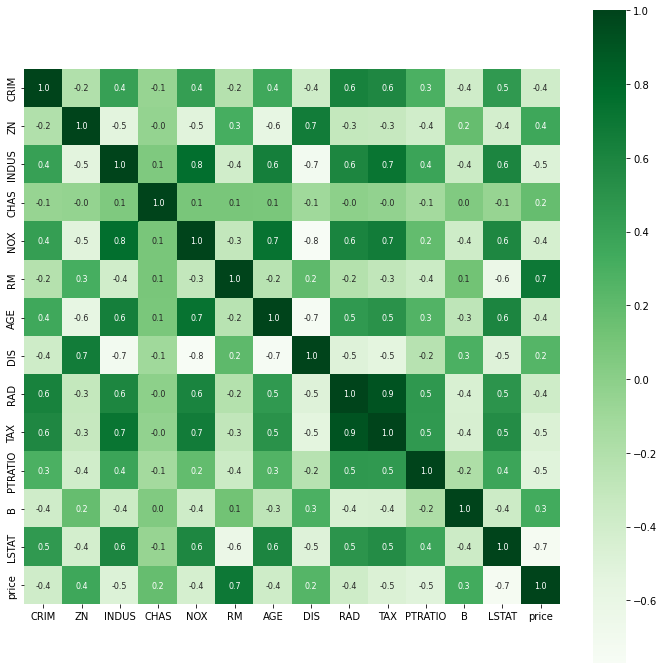

In [13]:
# for the better understanding about the data, creating heatmap
plt.figure(figsize =(12,12))
sns.heatmap(corelation,cbar =True, square = True,fmt = '0.1f',annot = True,annot_kws={'size':8}, cmap = 'Greens')

Here +1 values indicate positive corelated and  -ve values indicate means negative corelated (decrease if other parameter increases)


*   fmt = 0.1f means float value upto first dicemal point.
*   annot means annoation in the sidebar of the chart (features names).

*   annot_kws means increase or decrease text size.
*   cmap --> colour of the heatmap





In [14]:
#'
X = house_price_data.drop('price',axis = 1)
Y = house_price_data['price']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 1)

In [16]:
print(X.shape,X_test.shape,X_test.shape)

(506, 13) (102, 13) (102, 13)


In [17]:
# model
model = XGBRegressor()

In [18]:
# fitting the model
model.fit(X_train,Y_train)

[06:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [19]:
# predition
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[25.048151  22.662462   8.458681  20.905691  14.563758  25.679934
 27.51617   25.37881   45.644592  24.045649  10.660132  34.127537
 35.430862  36.522556  19.133648  18.85809   33.91484   47.677933
 20.870264  12.973117  29.153881  19.872124  24.924599  20.954975
 23.946466  19.023764  21.054193  26.7249    20.423717  22.496307
 25.230143   9.525525  24.883894  35.10766   13.956592  14.212715
 41.281284  11.095758  20.670912  15.821131  18.054611  23.936049
 29.978254  22.352541  23.109278  15.936208  27.03913   19.348799
 35.163136  14.839837  20.046473  17.663183  13.28538   29.442507
 24.924572  24.269297  22.715654  25.922625  43.211594  22.728882
 26.43058   15.387772  19.288763  21.005173  23.366146  11.016834
 15.550854  23.922337  20.622755  20.264856  15.010928  29.927689
 19.244297  23.75609   29.657944  20.367489  48.066456  21.156334
 19.50832   22.898682  17.519705  30.349104  11.508479  20.874737
 20.64511   38.51378   20.53336   21.551672  19.98694   14.073284
 20.957743

In [20]:
# model accurcy on train data
score_1  = metrics.r2_score(X_train_prediction,Y_train)
print('R square error in training dataset: ',score_1)

# rms error
score_2 = metrics.mean_absolute_error(X_train_prediction,Y_train)
print('mean square error in training dataset: ',score_2)

R square error in training dataset:  0.9729452840592877
mean square error in training dataset:  1.095920478235377


In [21]:
# predition on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[30.244747  27.42247   18.674818  21.062233  19.502811  20.532555
 27.66085   19.257133  19.98536   23.833563  28.730656  31.196053
 21.348223  20.080647  20.323883  32.001266  13.431162  43.769253
 23.777906  13.810081  20.28751   18.685682  25.17288   23.20837
 25.979816   9.0411625 15.107858  19.099976  43.958298  11.316055
 25.513964  17.687452  47.799717  16.05972   24.20881   20.856007
 16.045425  33.218906  14.518764  18.672695  25.420147  22.42197
 25.21465   15.7080145 17.159494  10.712171  48.539387  13.893352
 21.554802  17.34883   22.977318  21.135798  25.379213  22.05767
 11.151794  22.087044  12.40361   24.72886   17.784662  39.95547
 15.510622  25.497536  11.903179  14.375509  18.661009  39.615936
 40.431355  22.80781   21.114948  21.5172    23.904251   7.890534
 17.914284  20.903948  20.543924  20.891003  42.057674  23.300877
 25.278925  32.921463  16.744448  21.018211  34.063213  10.3202915
 22.453043  25.597956  14.615002  26.29593   20.105114  16.749098
 22.28874   4

In [22]:
# model accurcy on test 
score_1  = metrics.r2_score(X_test_prediction,Y_test)
print('R square error in test dataset: ',score_1)

# rms error
score_2 = metrics.mean_absolute_error(X_test_prediction,Y_test)
print('mean square error in test dataset: ',score_2)

R square error in test dataset:  0.8949664268831292
mean square error in test dataset:  2.2178991551492726


Text(0.5, 1.0, 'Actual value vs Predicted value')

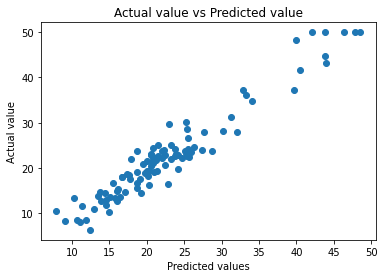

In [23]:
# ploting the predicted data and actual data
plt.figure(figsize=(6, 4))
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual value')
plt.title('Actual value vs Predicted value')

Text(0.5, 1.0, 'Actual value vs Predicted value')

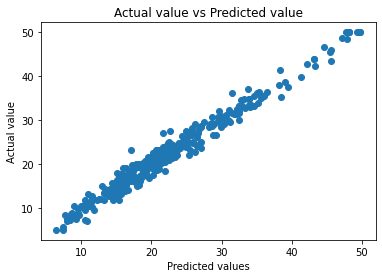

In [24]:
# ploting the predicted data and actual data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('Predicted values')
plt.ylabel('Actual value')
plt.title('Actual value vs Predicted value')

In [47]:
# saving model weights
import joblib
joblib.dump(model,'House_price_prediction.dat')

['House_price_prediction.dat']

In [26]:
house_price_data.to_csv()

',CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price\n0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0\n1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6\n2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7\n3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4\n4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2\n5,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7\n6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.6,12.43,22.9\n7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.9,19.15,27.1\n8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5\n9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.1,18.9\n10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0\n11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,

In [27]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')
house_price_data.to_csv('out.zip', index=False,
          compression=compression_opts)

In [28]:
! unzip /content/out.zip

Archive:  /content/out.zip
  inflating: out.csv                 


Traing data support vector machine.

In [29]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train,Y_train)

SVR()

In [30]:
# predition
X_train_prediction = svr_reg.predict(X_train)
print(X_train_prediction)

[24.57081723 23.82967296 16.41411433 20.87190429 13.68098675 19.50465396
 24.07572636 20.9612918  23.7235073  22.34062506 13.92088853 24.20695683
 22.74096051 22.11257915 24.16937228 21.62506559 25.22985346 23.36988373
 20.80714047 13.48071665 24.65545555 16.1780352  23.90553543 20.90818177
 23.62152546 22.84369958 22.22061129 23.8817373  24.20505931 22.47450256
 24.12323071 16.48386036 23.19188864 24.7015602  19.86441338 13.54469993
 23.948729   16.42323009 23.64392566 19.35751693 20.46905905 23.69857462
 25.18151118 22.86402861 23.09383815 15.86324568 22.77835361 23.50553306
 23.16275094 21.71077493 22.55891196 22.46073876 16.49902674 25.11603239
 16.31705554 24.21281818 22.90027223 22.20193957 23.56494249 16.40712133
 23.23316634 15.76160115 15.55108885 24.5178295  23.41877584 16.47114361
 19.34962244 23.89137601 16.68619329 22.70624733 20.87671566 23.20275124
 17.13423925 23.36533589 21.84536541 19.4708426  20.01707883 22.57517185
 21.88592863 22.958618   13.45669475 23.1713747  16

In [31]:
# model accurcy on train data
score_1  = metrics.r2_score(X_train_prediction,Y_train)
print('R square error in training dataset: ',score_1)

# rms error
score_2 = metrics.mean_absolute_error(X_train_prediction,Y_train)
print('mean square error in training dataset: ',score_2)

R square error in training dataset:  -4.316630893775742
mean square error in training dataset:  5.22581845195294


Text(0.5, 1.0, 'Actual value vs Predicted value')

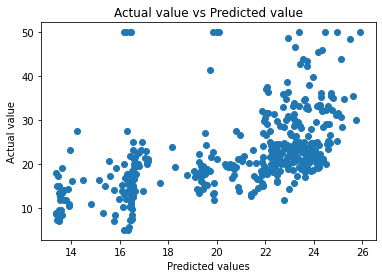

In [32]:
# ploting the predicted data and actual data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('Predicted values')
plt.ylabel('Actual value')
plt.title('Actual value vs Predicted value')

In [33]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [43]:
# prediction with this model
X_train_prediction = dec_reg.predict(X_train)
# accurcay socre (r sqaure)
accuracy_R2 = metrics.r2_score(X_train_prediction,Y_train)
print(accuracy_R2)

1.0


Text(0.5, 1.0, 'Actual value vs Predicted value')

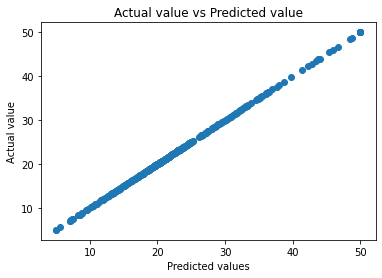

In [44]:
# ploting the predicted data and actual data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('Predicted values')
plt.ylabel('Actual value')
plt.title('Actual value vs Predicted value')

In [45]:
# prediction on test dataset
X_test_prediction = dec_reg.predict(X_test)
# accuracy socre
accuracy_test_R2 = metrics.r2_score(X_test_prediction,Y_test)
print(accuracy_test_R2)

0.7683653499077481


Text(0.5, 1.0, 'Actual value vs Predicted value')

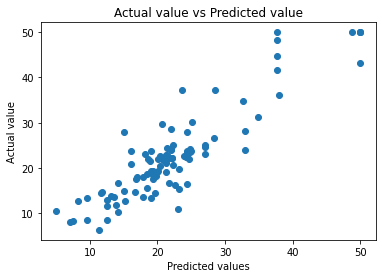

In [46]:
# ploting the predicted data and actual data
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual value')
plt.title('Actual value vs Predicted value')

In [39]:
# training data with eladtic net regressor
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet()
elastic_reg.fit(X_train,Y_train)

ElasticNet()

In [40]:
# prediction with this model
X_train_prediction = elastic_reg.predict(X_train)
# accurcay socre (r sqaure)
accuracy_R2 = metrics.r2_score(X_train_prediction,Y_train)
print(accuracy_R2)

0.4774953672274447


In [41]:
# prediction on test dataset
X_test_prediction = elastic_reg.predict(X_test)
# accuracy socre
accuracy_test_R2 = metrics.r2_score(X_test_prediction,Y_test)
print(accuracy_test_R2)

0.30655421701757246


Text(0.5, 1.0, 'Actual value vs Predicted value')

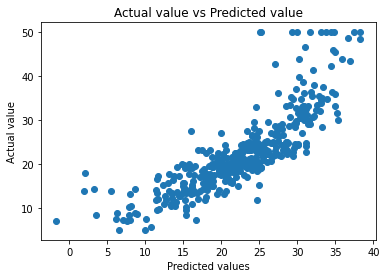

In [42]:
# ploting the predicted data and actual data
plt.scatter(X_train_prediction,Y_train)
plt.xlabel('Predicted values')
plt.ylabel('Actual value')
plt.title('Actual value vs Predicted value')